# Classifying Urban sounds using Deep Learning
**By:**
- Shaikha Bin Ateeq 
- Alanoud Alosaimi 
- Raghad Althanyan 

### OverView  :

Following on from the previous notebook, we identifed the following audio properties that need preprocessing to ensure consistency across the whole dataset:
- Audio Channels
- Sample rate
- Bit-depth

also We use Mel-Frequency Cepstral Coefficients(MFCC) and extract it from audio samples.now lets move on to split and Build our model 

**Import Libraries:**

In [1]:
import keras
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
#from keras.layers import Convolution2D, MaxPooling2D
#from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
#from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import classification_report,confusion_matrix 
from keras.layers import Dense, Embedding, LSTM, Input, Flatten, Dropout, Activation, Conv1D, Conv2D,MaxPooling1D, AveragePooling1D, GlobalAveragePooling2D

Read The Data From Pickle File:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
with open('/content/drive/MyDrive/Df_Final.pickle','rb') as read_file:
    df5 = pickle.load(read_file)
    
df5.head(5)

,MFCC,class_name
0,"[[-1.0, -1.0, -0.6859621, -0.4066782, -0.27337...",dog_bark
1,"[[-1.0, -0.92530745, -0.8827135, -0.83456916, ...",children_playing
2,"[[-0.5573074, -0.52561057, -0.62860227, -0.678...",children_playing
3,"[[-0.9489181, -0.8168003, -0.7987346, -0.78233...",children_playing
4,"[[-0.21790166, -0.15364559, -0.22467631, -0.20...",children_playing


In [6]:
df5.shape

(10903, 2)

In [7]:
option=['Scissors','Bus','Computer_keyboard']
df5 = df5[~df5.class_name.isin(option)]


In [8]:
df5 = df5.rename(columns={'MFCC': 'MFCC_Padded'})

In [9]:
df5 = shuffle(df5)

In [10]:
df5

,MFCC_Padded,class_name
2005,"[[-0.9172667, -0.87912154, -0.8968485, -0.8754...",air_conditioner
2200,"[[-1.0, -0.86244076, -0.73649526, -0.7827893, ...",street_music
6096,"[[-1.0, -1.0, -1.0, -0.914289, -0.1096527, 0.4...",dog_bark
6520,"[[-0.41883564, -0.5770368, -0.77462727, -0.683...",drilling
3158,"[[-1.0, -1.0, -1.0, -0.8885745, -0.16790804, -...",drilling
...,...,...
8849,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",Laughter
1960,"[[-1.0, 0.61632097, 0.7171702, 0.85404974, 0.7...",jackhammer
6561,"[[-1.0, -1.0, -1.0, -0.7659427, -0.47965208, -...",dog_bark
7418,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",drilling


In [11]:
df5.class_name.value_counts()

dog_bark            1000
engine_idling       1000
air_conditioner     1000
drilling            1000
children_playing    1000
street_music        1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Laughter             300
Applause             300
Tearing              300
Fireworks            300
Cough                243
Microwave_oven       146
Keys_jangling        139
Telephone            120
Name: class_name, dtype: int64

In [12]:
df5 = df5.reset_index(drop=True)

In [13]:
df5

,MFCC_Padded,class_name
0,"[[-0.9172667, -0.87912154, -0.8968485, -0.8754...",air_conditioner
1,"[[-1.0, -0.86244076, -0.73649526, -0.7827893, ...",street_music
2,"[[-1.0, -1.0, -1.0, -0.914289, -0.1096527, 0.4...",dog_bark
3,"[[-0.41883564, -0.5770368, -0.77462727, -0.683...",drilling
4,"[[-1.0, -1.0, -1.0, -0.8885745, -0.16790804, -...",drilling
...,...,...
10575,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",Laughter
10576,"[[-1.0, 0.61632097, 0.7171702, 0.85404974, 0.7...",jackhammer
10577,"[[-1.0, -1.0, -1.0, -0.7659427, -0.47965208, -...",dog_bark
10578,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",drilling


In [14]:
#df5=df5.groupby('class_name',as_index = False,group_keys=False).apply(lambda s: s.sample(200,replace=True))

In [15]:
#df5=df5.reset_index(drop=True)

In [16]:
#len(df5)

In [17]:
#df5 = df5.rename(columns={'MFCC Padded': 'MFCC_Padded'})

In [18]:
#df5

In [19]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(df5.MFCC_Padded.tolist())
y = np.array(df5.class_name.tolist())

In [20]:
X.shape

(10580, 40, 174)

In [21]:
y.shape

(10580,)

In [22]:
#y.head()
aa = pd.DataFrame(y)
aa.head(590)

,0
0,air_conditioner
1,street_music
2,dog_bark
3,drilling
4,drilling
...,...
585,air_conditioner
586,air_conditioner
587,street_music
588,dog_bark


In [23]:
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [24]:
yy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
num_labels = 18
num_labels

18

### Split the dataset:

In [26]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.25, random_state= 42)

In [27]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((6348, 40, 174),
 (2116, 40, 174),
 (6348, 18),
 (2116, 18),
 (2116, 40, 174),
 (2116, 18))

In [28]:
#X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

In [29]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
#reshaping to shape required by CNN
X_train2=np.reshape(X_train,(X_train.shape[0], 40,174,1))
X_val2=np.reshape(X_val,(X_val.shape[0], 40,174,1))
X_test2=np.reshape(X_test,(X_test.shape[0], 40,174,1))

In [31]:
X_train2.shape, X_val2.shape, y_train.shape, y_val.shape

((6348, 40, 174, 1), (2116, 40, 174, 1), (6348, 18), (2116, 18))

In [32]:
X_train2.shape[1:]

(40, 174, 1)

In [33]:
X_train2.shape

(6348, 40, 174, 1)

In [34]:
y_train.shape

(6348, 18)

In [35]:
X_train.shape[1:]

(40, 174)

# EX1:

In [36]:
from tensorflow.keras.layers import InputLayer, BatchNormalization, MaxPooling2D
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime 

In [37]:
model = Sequential()

input_shape=X_train2.shape[1:]

model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units = num_labels, activation="softmax"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 174, 64)       1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 87, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 87, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 44, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 44, 128)       0         
                                                                 
 flatten (Flatten)           (None, 56320)             0

In [39]:
model.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

In [40]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 25, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='weights3.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model.fit(X_train2, y_train,
          batch_size = 300, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
22/22 [==============================] - ETA: 0s - loss: 2.3478 - accuracy: 0.2004
Epoch 00001: val_loss improved from inf to 1.91639, saving model to weights3.best.hdf5
22/22 [==============================] - 12s 116ms/step - loss: 2.3478 - accuracy: 0.2004 - val_loss: 1.9164 - val_accuracy: 0.3511
Epoch 2/300
21/22 [===========================>..] - ETA: 0s - loss: 1.8084 - accuracy: 0.3875
Epoch 00002: val_loss improved from 1.91639 to 1.48461, saving model to weights3.best.hdf5
22/22 [==============================] - 2s 94ms/step - loss: 1.8067 - accuracy: 0.3885 - val_loss: 1.4846 - val_accuracy: 0.5132
Epoch 3/300
21/22 [===========================>..] - ETA: 0s - loss: 1.4927 - accuracy: 0.5138
Epoch 00003: val_loss improved from 1.48461 to 1.24298, saving model to weights3.best.hdf5
22/22 [==============================] - 2s 93ms/step - loss: 1.4911 - accuracy: 0.5143 - val_loss: 1.2430 - val_accuracy: 0.5969
Epoch 4/300
21/22 [===========================>..] - E

Text(0.5, 1.0, 'Training-Validation Accuracy')

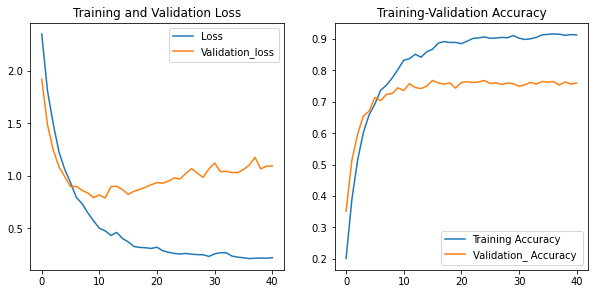

In [41]:
#saving the model history
loss = pd.DataFrame(model.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [42]:
prediction = model.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
print(y_pred)


[ 8 12 12 ... 11 10 10]


In [43]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.24      0.21        51
           1       0.26      0.24      0.25        58
           2       0.23      0.36      0.28        58
           3       0.21      0.16      0.18        32
           4       0.22      0.20      0.21        65
           5       0.13      0.16      0.14        31
           6       0.30      0.22      0.25        59
           7       0.27      0.14      0.19        28
           8       0.95      0.94      0.95       213
           9       0.91      0.96      0.93        96
          10       0.64      0.91      0.75       174
          11       0.92      0.79      0.85       209
          12       0.89      0.87      0.88       181
          13       0.97      0.92      0.94       198
          14       0.94      0.89      0.91        83
          15       0.85      0.92      0.88       206
          16       0.99      0.86      0.92       180
          17       0.87    

# EX2:

In [44]:
model2 = Sequential()


model2.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model2.add(MaxPooling2D(padding="same"))

model2.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model2.add(MaxPooling2D(padding="same"))
model2.add(Dropout(0.8))

model2.add(Flatten())

model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.8))

model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.8))


model2.add(Dense(units = num_labels, activation="softmax"))

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 40, 174, 128)      3328      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 87, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 87, 128)       409728    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 44, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 10, 44, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 56320)            

In [46]:
model2.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

In [47]:
ess = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 25, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='weights4.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model2.fit(X_train2, y_train,
          batch_size = 300, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, ess])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
22/22 [==============================] - ETA: 0s - loss: 2.6841 - accuracy: 0.1079
Epoch 00001: val_loss improved from inf to 2.44072, saving model to weights4.best.hdf5
22/22 [==============================] - 5s 187ms/step - loss: 2.6841 - accuracy: 0.1079 - val_loss: 2.4407 - val_accuracy: 0.2117
Epoch 2/300
21/22 [===========================>..] - ETA: 0s - loss: 2.4290 - accuracy: 0.1778
Epoch 00002: val_loss improved from 2.44072 to 2.24945, saving model to weights4.best.hdf5
22/22 [==============================] - 3s 150ms/step - loss: 2.4273 - accuracy: 0.1786 - val_loss: 2.2494 - val_accuracy: 0.2963
Epoch 3/300
21/22 [===========================>..] - ETA: 0s - loss: 2.2379 - accuracy: 0.2643
Epoch 00003: val_loss improved from 2.24945 to 1.99058, saving model to weights4.best.hdf5
22/22 [==============================] - 3s 153ms/step - loss: 2.2379 - accuracy: 0.2645 - val_loss: 1.9906 - val_accuracy: 0.3743
Epoch 4/300
21/22 [===========================>..] - 

##**Saving Model**

In [48]:
model2.save("Model2.h5")

Text(0.5, 1.0, 'Training-Validation Accuracy')

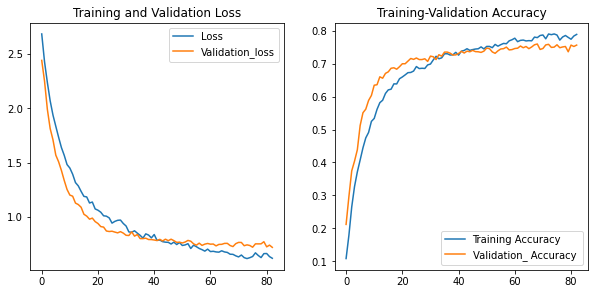

In [49]:
#saving the model history
loss = pd.DataFrame(model2.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [50]:
prediction = model2.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
print(y_pred)

[ 8 12 12 ... 11 10 10]


In [51]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.10      0.10        51
           1       0.19      0.05      0.08        58
           2       0.17      0.41      0.24        58
           3       0.35      0.19      0.24        32
           4       0.20      0.26      0.23        65
           5       0.00      0.00      0.00        31
           6       0.25      0.36      0.30        59
           7       0.00      0.00      0.00        28
           8       0.91      0.96      0.93       213
           9       0.89      0.93      0.91        96
          10       0.74      0.87      0.80       174
          11       0.91      0.82      0.86       209
          12       0.90      0.76      0.82       181
          13       0.97      0.91      0.94       198
          14       0.95      0.88      0.91        83
          15       0.91      0.90      0.90       206
          16       0.92      0.96      0.94       180
          17       0.80    

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model2.predict_classes(X_test))